<hr>

# Lab 11: Community Detection
Total Marks: 9 Marks + 2 Marks(individual assessment) = 11 Marks


<hr>

## Tips:
Use Python library:
<ul>
<li> <em>networkx.algorithms.community.centrality </em> for girvan_newman </li>
<li> <em>community.community_louvain</em> for Louvain </li>
<li> <em>networkx.algorithms.community</em> for greedy_modularity_communities </li>
</ul>

## i. Using Manual calculation and Python code to find the Communities by Girvan-Newman Algorithm for the attached graph shown below 

( 7 marks manual calculation + 4 marks Python implementation =11 marks)

The `Girvan-Newman algorithm` calculates the `number` of `shortest path` going through `edges`. By calculating the shortest path we can then find the communities of a social network graph. This algorithm involves three steps: A brief description of each step is provided on the following graph :<br><br>

<img src='https://courses.ryerson.ca/content/enforced/581747-cp8210cps521_w22_01/GrpahofAssignment.jpg?d2lSessionVal=lZqra3Jo6KXKJU38VdpcZBnGy&ou=581747' height='300px' alt="Original Graph">



<img src="https://cdn.discordapp.com/attachments/941943020578820136/960701586244530176/Screen_Shot_2022-04-04_at_8.44.41_PM.png" width=30% alt="Graph Starting from Node B">
<br> <pre>                  Original Graph                           Graph Starting from Node B </pre>



## Step I: 
The algorithm begins by performing a `breadth-first search (BFS)` of the graph, starting at the node X. Edges between different levels are called `DAG edges` (“DAG” stands for directed acyclic graph). 
<br>In following graph start by node B as root. Solid edges are DAG edges and dashed edges connect nodes at the same level

## Step II: 
The second step of the GN algorithm is to `label` each node by the `number` of `shortest paths` that reach it from the root. Start by labeling the root by 1. Then, from the `top down`, label each node by the sum of the labels of its parents . Show the resulted graph. 

## Step III: 

The third and final step is to `calculate the credit`, for each node and for edges between the nodes.Show the resulted graph in the step.
<br><br> 
Now complete the `betweenness calculation`, and repeat this calculation for every node as the root and sum the contributions.<br>Note that you must `divide by 2` to get the `true betweenness`.
<br> You need to calculated the betweenness for every node as the root.<br> And then `sum` the contributions of all the edges to find the true betweenness for every edge. <br>Finally, `remove edges` with the highest betweenness, until the graph has broken into a suitable number of connected components.<br><br> 
<br>
For answering this question show the **`resulted communities`** as a set and graph , by *removing edges with betweenness greater than or equal to a proper number*.
<br><br>
For more details refer to Section 10-2 of book `“Mining of massive datasets"` by J. Leskovec, A. Rajaraman.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
from pprint import pprint

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

Note: Graph looks slightly off from Image provided, but its the same thing just slightly skewed


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


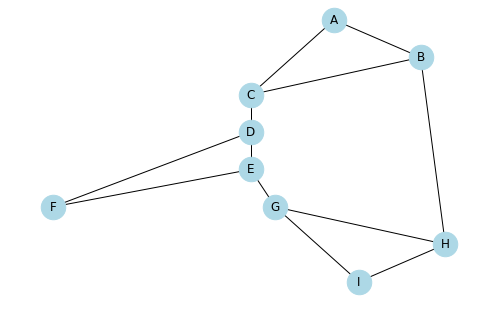

In [ ]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I'])
G.add_edges_from([('A', 'B'), ('B','C'),('A', 'C'),('B','H'),('C','D'),('D','E'),('H','I'),('H','G'),('I','G'),('D','F'),('E','F'),('G','E')])
pos = graphviz_layout(G,prog='dot')
nx.draw(G,pos,with_labels=True,node_size=600,node_color='lightblue')
print('Note: Graph looks slightly off from Image provided, but its the same thing just slightly skewed')

[['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


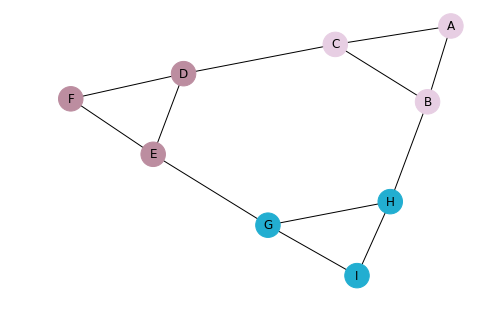

In [ ]:
k = 2 
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    node_groups = list(sorted(c) for c in communities)
print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('#E7CEE3')
    elif node in node_groups[1]:
        color_map.append('#BC8DA0')
    else:
        color_map.append('#22AED1')

nx.draw(G, node_color=color_map,node_size=600, with_labels=True)
plt.show()

## ii. Using Python, find the Communities in the graph, as seen in (i) by Louvain Algorithm


**Louvain Algorithm** detects communities in `large networks`. it maximizes a modularity score for each community. 
<br><br>The `modularity` qualifies the quality of an assignment of nodes to communities. It evaluates how densely connected the modes within a community are and compare to how connected they would be in a random network.<br><br>
Louvain is a hierarchical clustering algorithm that recursively merges communities into a single node and executes modularity clustering on condensed graphs.

In [ ]:
from community import community_louvain

Partitions:
{'A': 0, 'B': 0, 'C': 0, 'D': 2, 'E': 2, 'F': 2, 'G': 1, 'H': 1, 'I': 1}
  
Communities: 3
-------------------------------
Community 0 : ['A', 'B', 'C']
Community 1 : ['G', 'H', 'I']
Community 2 : ['D', 'E', 'F']


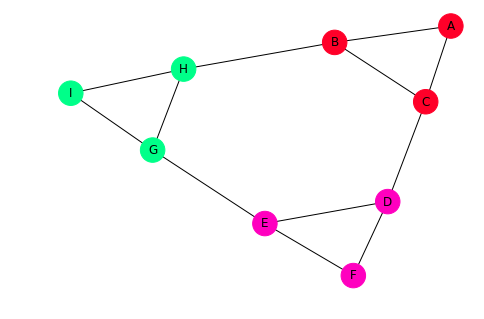

In [ ]:
import matplotlib.cm as cm
#return partition as a dictionary 
# these partitions are the associated communities detected from G in form of a dictionary
#keys: nodes values: associated community
partition = community_louvain.best_partition(G)
print("Partitions:")
print(partition)
print("  ")

#Dic comprehension to group keys that have the same values in a dictionary
d = {n:[k for k in partition.keys() if partition[k] == n] for n in set(partition.values())}
print('Communities:',len(d))
print('-------------------------------')
for i in d:
    print('Community',i,':',d[i])


#visualization
pos = nx.spring_layout(G)
cmap = cm.get_cmap('gist_rainbow',max(partition.values()) + 1)
nx.draw(G, node_color=list(partition.values()),cmap = cmap,node_size=600, with_labels=True)
plt.show()

## Colormap values


Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

## iii. Using Python, find the Communities in the graph, as seen in (i) by greedy_modularity_communities Algorithm

**Clauset-Newman-Moore greedy modularity**: begins with each node in its own community and `repeatedly joins` the pair of communities that lead to the `largest modularity` until no futher increase in modularity is possible (a maximum)

<br>
similar to the Louvain Algorithm. The initialization is the same. Then, instead of moving a single node
from one community to another, we combine the pair of communities that maximize the increase in modularity

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

Communities: 3
-------------------------------
Community 0 : ['B', 'C', 'A']
Community 1 : ['E', 'F', 'D']
Community 2 : ['G', 'I', 'H']


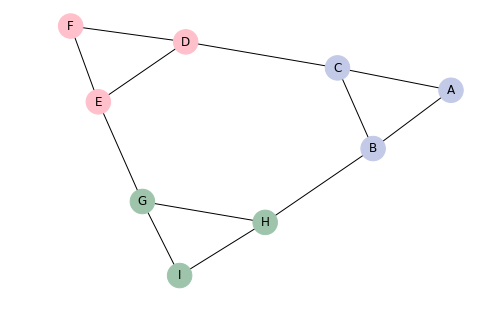

In [ ]:
gm_communities = greedy_modularity_communities(G)

#list comprehension to convert frozenset to list of sets
gm_set=([list(x) for x in gm_communities])

print("Communities:",len(gm_communities))
print('-------------------------------')
for i in range(len(gm_set)):
    print('Community',i,':',gm_set[i])

node_groups = []
for com in gm_set:
    node_groups.append(list(com))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('#C2CAE8')
    elif node in node_groups[1]:
        color_map.append('pink')
    else:
        color_map.append('#9EC5AB')

nx.draw(G, node_color=color_map,node_size=600, with_labels=True)
plt.show()